# Datenjournalismus in Python - 
# Eine praktische Einführung in die Programmierung


### Natalie Widmann




Wintersemester 2022 / 2023


Universität Leipzig





## Was sind Daten?


### Strukturierte Daten

Strukturierte Daten sind gut organisiert und so formattiert, dass es einfach ist sie zu durchsuchen, sie maschinell zu lesen oder zu verarbeiten. Das einfachste Beispiel ist eine Tabelle in der jede Spalte eine Kategorie oder einen Wert festlegt. 


### Unstrukturierte Daten

Im Gegensatz dazu sind unstrukturierte Daten nicht in einem bestimmten Format oder einer festgelegten Struktur verfügbar. Dazu zählen Texte, Bilder, Social Media Feeds, aber auch Audio Files, etc.


### Semi-Strukturierte Daten

Semi-strukturierte Daten bilden eine Mischform. Beispielsweise eine Tabelle mit E-Mail Daten, in der Empfänger, Betreff, Datum und Absender strukturierte Informationen enthalten, der eigentliche Text jedoch unstrukturiert ist. 

## Was sind Daten?

![Daten](../imgs/data.png)

### Aggregated figures for Natural Disasters in EM-DAT

Link: https://data.humdata.org/dataset/emdat-country-profiles


In 1988, the **Centre for Research on the Epidemiology of Disasters (CRED)** launched the **Emergency Events Database (EM-DAT)**. EM-DAT was created with the initial support of the **World Health Organisation (WHO) and the Belgian Government**.

The main objective of the database is to **serve the purposes of humanitarian action at national and international levels**. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.

EM-DAT contains essential core data on the **occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day**. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.



In [1]:
# Install a pip package im Jupyter Notebook
!pip3 install pandas
!pip3 install openpyxl

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
data = pd.read_excel('../data/emdat.xlsx', engine="openpyxl")

/home/natalie/.local/lib/python3.9/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
data

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
0,#date +occurred,#country +name,#country +code,#cause +group,#cause +subgroup,#cause +type,#cause +subtype,#frequency,#affected +ind,#affected +ind +killed,NaN,#value +usd,NaN
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000,NaN,NaN,3.077091
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000,NaN,NaN,3.077091
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300,NaN,NaN,3.077091
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30,NaN,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,YEM,Natural,Hydrological,Flood,Flash flood,1,3400,13,NaN,NaN,NaN
10339,2022,South Africa,ZAF,Natural,Hydrological,Flood,NaN,7,143119,562,3.164000e+09,NaN,NaN
10340,2022,Zambia,ZMB,Natural,Hydrological,Flood,NaN,1,15000,3,NaN,NaN,NaN
10341,2022,Zimbabwe,ZWE,Natural,Hydrological,Flood,NaN,1,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

Entferne erste Zeile

In [4]:
data = data.drop(index=0)

Änderung des Datentyps für integeger und float Spalten

In [5]:
cols = ['Year', 'Total Events', 'Total Affected', 'Total Deaths', 'Total Damage (USD, adjusted)']
for col in cols:
    data[col] = pd.to_numeric(data[col])

In [6]:
data

,Year,Country,ISO,Disaster Group,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)","Total Damage (USD, adjusted)",CPI
1,1900,Cabo Verde,CPV,Natural,Climatological,Drought,Drought,1,NaN,11000.0,NaN,NaN,3.077091
2,1900,India,IND,Natural,Climatological,Drought,Drought,1,NaN,1250000.0,NaN,NaN,3.077091
3,1900,Jamaica,JAM,Natural,Hydrological,Flood,NaN,1,NaN,300.0,NaN,NaN,3.077091
4,1900,Japan,JPN,Natural,Geophysical,Volcanic activity,Ash fall,1,NaN,30.0,NaN,NaN,3.077091
5,1900,Turkey,TUR,Natural,Geophysical,Earthquake,Ground movement,1,NaN,140.0,NaN,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,YEM,Natural,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN,NaN
10339,2022,South Africa,ZAF,Natural,Hydrological,Flood,NaN,7,143119.0,562.0,3.164000e+09,NaN,NaN
10340,2022,Zambia,ZMB,Natural,Hydrological,Flood,NaN,1,15000.0,3.0,NaN,NaN,NaN
10341,2022,Zimbabwe,ZWE,Natural,Hydrological,Flood,NaN,1,NaN,NaN,NaN,NaN,NaN


Entferne irrelevante Spalten, hier: *ISO, Disaster Group, Total Damage (USD, adjusted)*

In [7]:
cols = ['ISO', 'Disaster Group', 'Total Damage (USD, adjusted)']
data = data.drop(cols, axis=1)

In [8]:
data

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,NaN,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,NaN,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,NaN,1,NaN,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,NaN,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,NaN,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,NaN,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,NaN,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,NaN,1,NaN,NaN,NaN,NaN


### Duplikate finden und entfernen

`.duplicated()` findet Zeilen mit genau den gleichen Werte.

Mit `drop_duplicates()` können diese entfernt werden.

In [15]:
data.duplicated()

1        False
2        False
3        False
4        False
5        False
         ...  
10338    False
10339    False
10340    False
10341    False
10342    False
Length: 10342, dtype: bool

In [10]:
data.drop_duplicates()

,Year,Country,Disaster Subroup,Disaster Type,Disaster Subtype,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
1,1900,Cabo Verde,Climatological,Drought,Drought,1,NaN,11000.0,NaN,3.077091
2,1900,India,Climatological,Drought,Drought,1,NaN,1250000.0,NaN,3.077091
3,1900,Jamaica,Hydrological,Flood,NaN,1,NaN,300.0,NaN,3.077091
4,1900,Japan,Geophysical,Volcanic activity,Ash fall,1,NaN,30.0,NaN,3.077091
5,1900,Turkey,Geophysical,Earthquake,Ground movement,1,NaN,140.0,NaN,3.077091
...,...,...,...,...,...,...,...,...,...,...
10338,2022,Yemen,Hydrological,Flood,Flash flood,1,3400.0,13.0,NaN,NaN
10339,2022,South Africa,Hydrological,Flood,NaN,7,143119.0,562.0,3.164000e+09,NaN
10340,2022,Zambia,Hydrological,Flood,NaN,1,15000.0,3.0,NaN,NaN
10341,2022,Zimbabwe,Hydrological,Flood,NaN,1,NaN,NaN,NaN,NaN


## Daten speichern

In [11]:
data.to_csv('../data/clean_emdat.csv')

Daten neu laden

## Weitere Recherchefragen

- Wie viele Naturkatastrophen gab es in Deutschland?
- Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?
- Welche Naturkatastrophen fordern die meisten Todesopfer?
- Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?
- Wie stark ist ein Land von Naturkatastrophen betroffen?
- Welche Länder sind von Naturkatastrophen betroffen haben aber vergleichsweise geringe Todesfälle?


#### Wie viele Naturkatastrophen gab es in Deutschland?

Korrektur der Ländernamen

In [12]:
# Vorkommen von Deutschland
for country in data['Country'].unique():
    if 'german' in country.lower():
        print(country)

Germany Fed Rep
Germany Dem Rep
Germany


Funktion die dies bereinigt

In [13]:
def clean_country


SyntaxError: invalid syntax (26193582.py, line 1)

In [ ]:
text = 'Germany Fed Rep'
text = 'Mexico'
clean_country(text)

Anwendung der Funktion auf alle Werte einer Spalte

In [ ]:
for index, row in data.iterrows():
    data.loc[index, "Country"] = clean_country(row['Country'])

In [16]:
help(data.loc)

Help on _LocIndexer in module pandas.core.indexing object:

class _LocIndexer(_LocationIndexer)
 |  Access a group of rows and columns by label(s) or a boolean array.
 |  
 |  ``.loc[]`` is primarily label based, but may also be used with a
 |  boolean array.
 |  
 |  Allowed inputs are:
 |  
 |  - A single label, e.g. ``5`` or ``'a'``, (note that ``5`` is
 |    interpreted as a *label* of the index, and **never** as an
 |    integer position along the index).
 |  - A list or array of labels, e.g. ``['a', 'b', 'c']``.
 |  - A slice object with labels, e.g. ``'a':'f'``.
 |  
 |    .. warning:: Note that contrary to usual python slices, **both** the
 |        start and the stop are included
 |  
 |  - A boolean array of the same length as the axis being sliced,
 |    e.g. ``[True, False, True]``.
 |  - An alignable boolean Series. The index of the key will be aligned before
 |    masking.
 |  - An alignable Index. The Index of the returned selection will be the input.
 |  - A ``callable`

In [ ]:
data[data['Country'] == 'Germany']

**oder** (viel übersichtlicher und effizienter)

mit `apply()` kann eine Funktion auf eine komplette Spalte oder Zeile des Dataframes angewendet werden

In [ ]:
data['Country'] = data['Country'].apply(clean_country)

In [ ]:
data[data['Country'] == 'Germany']

#### Welchen Anteil haben die unterschiedlichen Naturkatastrophentypen daran?

In [20]:
germany_data = data[data['Country'] == 'Germany']

# Visualisierung von DataFrames

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

Install [matplotlib](https://matplotlib.org/)

In [17]:
!pip3 install --upgrade pip
!pip3 install --upgrade Pillow
!pip3 install matplotlib
#!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [18]:
import matplotlib.pyplot as plt
#import seaborn as sns

In [19]:
germany_data['Disaster Type'].value_counts()

NameError: name 'germany_data' is not defined

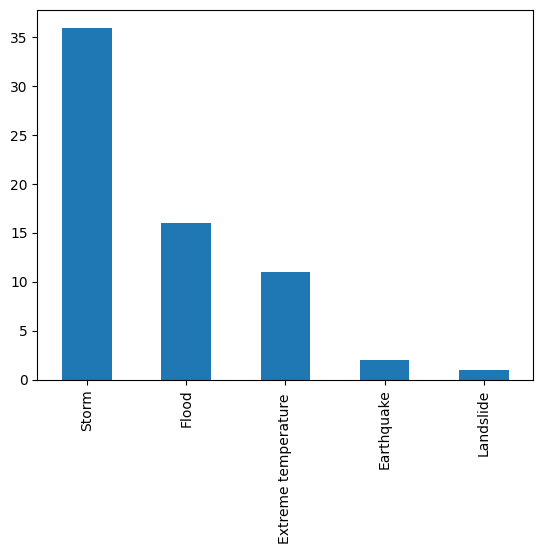

In [21]:
fig = germany_data['Disaster Type'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='Disaster Type'>

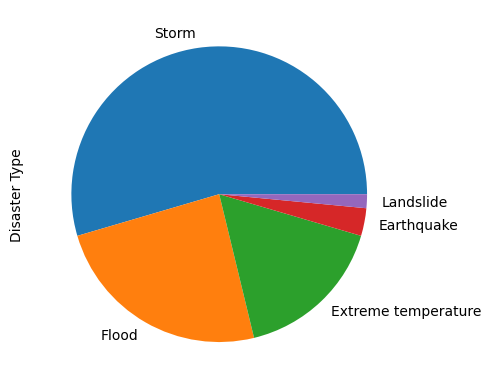

In [22]:
germany_data['Disaster Type'].value_counts().plot(kind='pie')

#### Welche Naturkatastrophensubtypen kommen vor?

<AxesSubplot: ylabel='Disaster Subtype'>

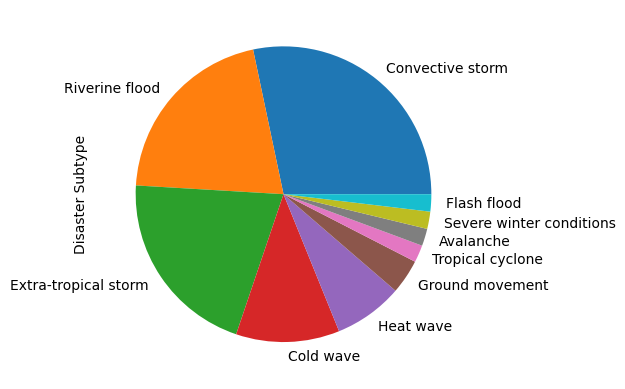

In [23]:
germany_data['Disaster Subtype'].value_counts().plot(kind='pie')

## Fehlende Werte - NaNs Values

Wo fehlen Werte im Datensatz?
Wie viele fehlen?

In [ ]:
germany_data

Wie viele Werte pro Spalte sind NaN?

In [ ]:
germany_data.info()

In [ ]:
data.isnull()

In [ ]:
data.isnull().sum()

### Möglichkeiten zum Umgang

- Zeilen mit fehlenden Werten entfernen
- fehlende Werte ersetzen


#### Alle Zeilen mit NaN Werten entfernen

`dropna()` 

In [ ]:
clean_data = germany_data.dropna()
clean_data

Entferne nur Zeilen die in einer bestimmten Spalte NaN Werte haben

In [ ]:
clean_data = germany_data.dropna(subset=['Disaster Subtype', 'Total Affected'])

### Fehlende Werte entfernen

**Vorteile**
- einfache Handhabung
- verständliche Methodik


**Nachteile**
- ein großer Teil der Daten wird nicht ausgewertet
- fehlende Werte können eine ganz andere Geschichte erzählen
- die Konsistenz über unterschiedliche Fragestellungen hinweg muss sichergestellt sein


### Fehlende Werte ersetzen

Mit `.fillna()` können alle NaN Werte in einem DataFrame oder einer Series automatisch ersetzt werden.

In [ ]:
data.fillna(0)

In [ ]:
data["Disaster Subtype"].fillna("No Subtype", inplace=True)

In [ ]:
data

Welche Werte für Total Affected, Total Deaths oder Total Damage?

- 0
- arithmetisches Mittel
- Median
- Berechnung aus anderen Spalten

In [ ]:
data["Total Deaths"].fillna(0, inplace=True)

In [ ]:
data["Total Affected"].fillna(data['Total Deaths'], inplace=True)

In [ ]:
data

### Fehlende Werte ersetzen

**Vorteile**
- Verwendung möglichst aller Daten
- genaue Analyse der fehlenden Werte kann zu neuen Erkenntnissen führen


**Nachteile**
- keine Standard Methodik
- eventuelle Verfälschung der Daten



## Daten speichern

In [11]:
data.to_csv('../data/clean_emdat.csv')

## Recherchefragen

#### Welche Naturkatastrophen fordern die meisten Todesopfer?

`.groupby()` gruppiert einen DataFrame nach den Werten einer oder mehreren Spalten.

Die Spalten nach denen man Gruppieren möchte werden als Argument übergeben. Danach folgt die gewünschte Berechnung auf dieser Gruppe. Das Ergebnis wird als DataFrame zurückgegeben. 

In [27]:
data.groupby('Disaster Type').sum()

/tmp/ipykernel_302661/3612715955.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('Disaster Type').sum()


,Year,Total Events,Total Affected,Total Deaths,"Total Damage (USD, original)",CPI
Disaster Type,,,,,,
Animal accident,2014,1,5.000000e+00,12.0,0.000000e+00,87.366298
Drought,1543555,792,2.862115e+09,11733889.0,2.098881e+11,43039.824471
Earthquake,2134925,1576,2.047664e+08,2343594.0,8.653494e+11,46522.663819
Extreme temperature,1115693,607,1.036420e+08,194056.0,6.886634e+10,38106.532522
Flood,7604541,5730,3.961051e+09,7002950.0,9.771118e+11,239869.775450
Fog,1952,1,0.000000e+00,4000.0,0.000000e+00,9.822074
Glacial lake outburst,4043,3,2.400000e+01,262.0,2.100000e+08,100.000000
Insect infestation,183314,95,2.802200e+06,0.0,2.292000e+08,4880.908507
Landslide,1277348,789,1.476713e+07,67417.0,1.125893e+10,36989.405750


In [26]:
data.groupby('Disaster Type')['Total Deaths'].sum()

Disaster Type
Animal accident                12.0
Drought                  11733889.0
Earthquake                2343594.0
Extreme temperature        194056.0
Flood                     7002950.0
Fog                          4000.0
Glacial lake outburst         262.0
Insect infestation              0.0
Landslide                   67417.0
Mass movement (dry)          4644.0
Storm                     1403607.0
Volcanic activity           86893.0
Wildfire                     4653.0
Name: Total Deaths, dtype: float64

`.groupby()` kann auch auf mehrere Spalten gleichzeitig angewendet werden

In [30]:
data.groupby(['Disaster Type', 'Disaster Subtype'])['Total Deaths'].sum()

Disaster Type         Disaster Subtype                
Drought               Drought                             11733812.0
Earthquake            Ground movement                      2075949.0
                      Tsunami                               267424.0
Extreme temperature   Cold wave                              17765.0
                      Heat wave                             172555.0
                      Severe winter conditions                3736.0
Flood                 Coastal flood                           5352.0
                      Flash flood                            70835.0
                      Riverine flood                       4445926.0
Insect infestation    Grasshopper                                0.0
                      Locust                                     0.0
Landslide             Avalanche                               5227.0
                      Landslide                              41435.0
                      Mudslide                  

#### Visualisierung

In [ ]:
data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

Welche Unterschiede gibt es zwischen den Ländern?

In [ ]:
country = 'India'
country_data = data[data['Country'] == country]
country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie')

#### Wie hat sich die Anzahl der Naturkatastrophen über die Jahre hin entwickelt?

## Länderdashboard

In [ ]:
def plot_pie(country_data):
    country_data.groupby('Disaster Type')['Total Deaths'].sum().plot(kind='pie', title='Anteil an getöten Menschen nach Naturkatastrophentyp')
    plt.show()

In [ ]:
def plot_time_evolution(country_data):
    yearly_events = country_data.groupby('Year')['Total Events'].sum()
    yearly_events.plot(kind='line', x='Year', y='Total Events', title='Anzahl an Naturkatastrophen pro Jahr')
    plt.show()

In [ ]:
def death_overview(country_data):
    total_deaths = country_data["Total Deaths"].sum()
    print(f'Getötete Menschen seit 1900: {total_deaths:,.0f}')

In [ ]:
def compute_anteil(country_total, world_total):
    anteil = round(country_total / (world_total / 100.0), 2)
    print(f'{anteil}% aller Menschen die weltweit von Naturkatastrophen betroffen sind leben hier.')

In [ ]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    
    compute_anteil(country_data['Total Affected'].sum(), data['Total Affected'].sum())
    death_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

In [ ]:
analyze(data, 'Bangladesh')

### Überblick über die Welt

Wie können wir die selbstdefinierte Funktion `analyze()` anpassen, so dass auch eine Gesamtstatistik, die alle Länder der Welt enthält abgefragt werden kann?

In [ ]:
def analyze(data, country):
    print(f'Naturkatastrophen in {country.upper()} \n')
    country_data = data[data['Country'] == country]
    stats_overview(country_data)
    plot_pie(country_data)
    plot_time_evolution(country_data)

In [ ]:
analyze(data, 'world')

# Zeit für Feedback



Link: https://ahaslides.com/3VAQJ

![Feedback QR Code](../imgs/qrcode_vl6.png)

